<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to creat a model
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [498]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [499]:
## First of all, load the dataset and take a look.

dfCH_path = '/Users/ChrisH/Desktop/ECON628-01-chrishy2ma/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
dfCH= pd.read_csv(dfCH_path)
dfCH.T

,0,1,2,3,4,5,6,7,8,9,...,270945,270946,270947,270948,270949,270950,270951,270952,270953,270954
Date,11/04/2015,03/02/2016,02/11/2016,02/03/2016,08/18/2015,04/20/2015,08/05/2015,06/25/2015,01/04/2016,11/10/2015,...,06/11/2015,11/24/2015,05/12/2015,04/08/2015,07/21/2015,12/22/2015,11/04/2015,10/20/2015,11/20/2015,01/27/2015
Store Number,3717,2614,2106,2501,3654,2569,2596,3456,4757,4346,...,2627,5162,4375,2545,2529,4057,5151,5152,3562,4446
City,SUMNER,DAVENPORT,CEDAR FALLS,AMES,BELMOND,CEDAR RAPIDS,OTTUMWA,CLEAR LAKE,BONDURANT,SHELLSBURG,...,DES MOINES,URBANDALE,GRIMES,IOWA CITY,CEDAR RAPIDS,DES MOINES,IDA GROVE,WATERLOO,WEST BURLINGTON,URBANDALE
Zip Code,50674,52807,50613,50010,50421,52402,52501,50428,50035,52332,...,50310,50322,50111,52245,52405,50316,51445,50702,52655,50322
County Number,9,82,7,85,99,57,90,17,77,6,...,77,77,77,52,57,77,47,7,29,77
County,Bremer,Scott,Black Hawk,Story,Wright,Linn,Wapello,Cerro Gordo,Polk,Benton,...,Polk,Polk,Polk,Johnson,Linn,Polk,Ida,Black Hawk,Des Moines,Polk
Category,1.0511e+06,1.0111e+06,1.0112e+06,1.0711e+06,1.03108e+06,1.0411e+06,1.05101e+06,1.0121e+06,1.03208e+06,1.08132e+06,...,1.0622e+06,1.03108e+06,1.06231e+06,1.0623e+06,1.0311e+06,1.0221e+06,1.0112e+06,1.0113e+06,1.0829e+06,1.03108e+06
Category Name,APRICOT BRANDIES,BLENDED WHISKIES,STRAIGHT BOURBON WHISKIES,AMERICAN COCKTAILS,VODKA 80 PROOF,AMERICAN DRY GINS,AMERICAN GRAPE BRANDIES,CANADIAN WHISKIES,IMPORTED VODKA,CINNAMON SCHNAPPS,...,PUERTO RICO & VIRGIN ISLANDS RUM,VODKA 80 PROOF,SPICED RUM,FLAVORED RUM,100 PROOF VODKA,TEQUILA,STRAIGHT BOURBON WHISKIES,TENNESSEE WHISKIES,MISC. IMPORTED CORDIALS & LIQUEURS,VODKA 80 PROOF
Vendor Number,55,395,65,395,297,205,85,65,370,65,...,55,301,260,35,300,410,259,85,192,260
Item Number,54436,27605,19067,59154,35918,31473,52806,10628,34006,82610,...,44215,38176,43334,43145,36887,88291,17956,26826,65258,37993


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [500]:
dfCH.head(5)    ## check the head,which are the first 5 row of the data

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [501]:
dfCH.tail(5)    ## check the tail,which are the last 5 row of the data

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270950,12/22/2015,4057,DES MOINES,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,$20.30,$30.45,4,$121.80,1.20,0.32
270951,11/04/2015,5151,IDA GROVE,51445,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,Evan Williams Str Bourbon,750,$7.47,$11.21,3,$33.63,2.25,0.59
270952,10/20/2015,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,$15.07,$22.61,6,$135.66,4.50,1.19
270953,11/20/2015,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,$26.05,$39.08,6,$234.48,10.50,2.77
270954,01/27/2015,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,$2.75,$4.13,8,$33.04,1.60,0.42


In [502]:
dfCH.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,NaN,NaN,NaN,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,NaN,NaN,NaN,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


In [503]:
dfCH.info

<bound method DataFrame.info of               Date  Store Number             City Zip Code  County Number  \
0       11/04/2015          3717           SUMNER    50674            9.0   
1       03/02/2016          2614        DAVENPORT    52807           82.0   
2       02/11/2016          2106      CEDAR FALLS    50613            7.0   
3       02/03/2016          2501             AMES    50010           85.0   
4       08/18/2015          3654          BELMOND    50421           99.0   
5       04/20/2015          2569     CEDAR RAPIDS    52402           57.0   
6       08/05/2015          2596          OTTUMWA    52501           90.0   
7       06/25/2015          3456       CLEAR LAKE    50428           17.0   
8       01/04/2016          4757        BONDURANT    50035           77.0   
9       11/10/2015          4346       SHELLSBURG    52332            6.0   
10      09/28/2015          2648  WEST DES MOINES    50265           77.0   
11      10/28/2015          2600        OSKA

In [504]:
## I want to make some graphs,however,some variables have $ sign. $ has to be removed.


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [506]:
## Remove DOLLAR SIGN by using replace command
dfCH['Sale (Dollars)'] = dfCH['Sale (Dollars)'].str.replace('$', '')
dfCH['State Bottle Cost']=dfCH['State Bottle Cost'].str.replace('$', '')
dfCH['State Bottle Retail']=dfCH['State Bottle Retail'].str.replace('$', '')
dfCH

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


In [507]:
## Then translate string variables to numeric
##Only Series of length 1 can be converted to a float
##http://stackoverflow.com/questions/23748842/understanding-math-errors-in-pandas-dataframes
dfCH['State Bottle Cost']=pd.to_numeric(dfCH['State Bottle Cost'])
dfCH['State Bottle Retail']=pd.to_numeric(dfCH['State Bottle Retail'])
dfCH['Sale (Dollars)']=pd.to_numeric(dfCH['Sale (Dollars)'])
dfCH

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


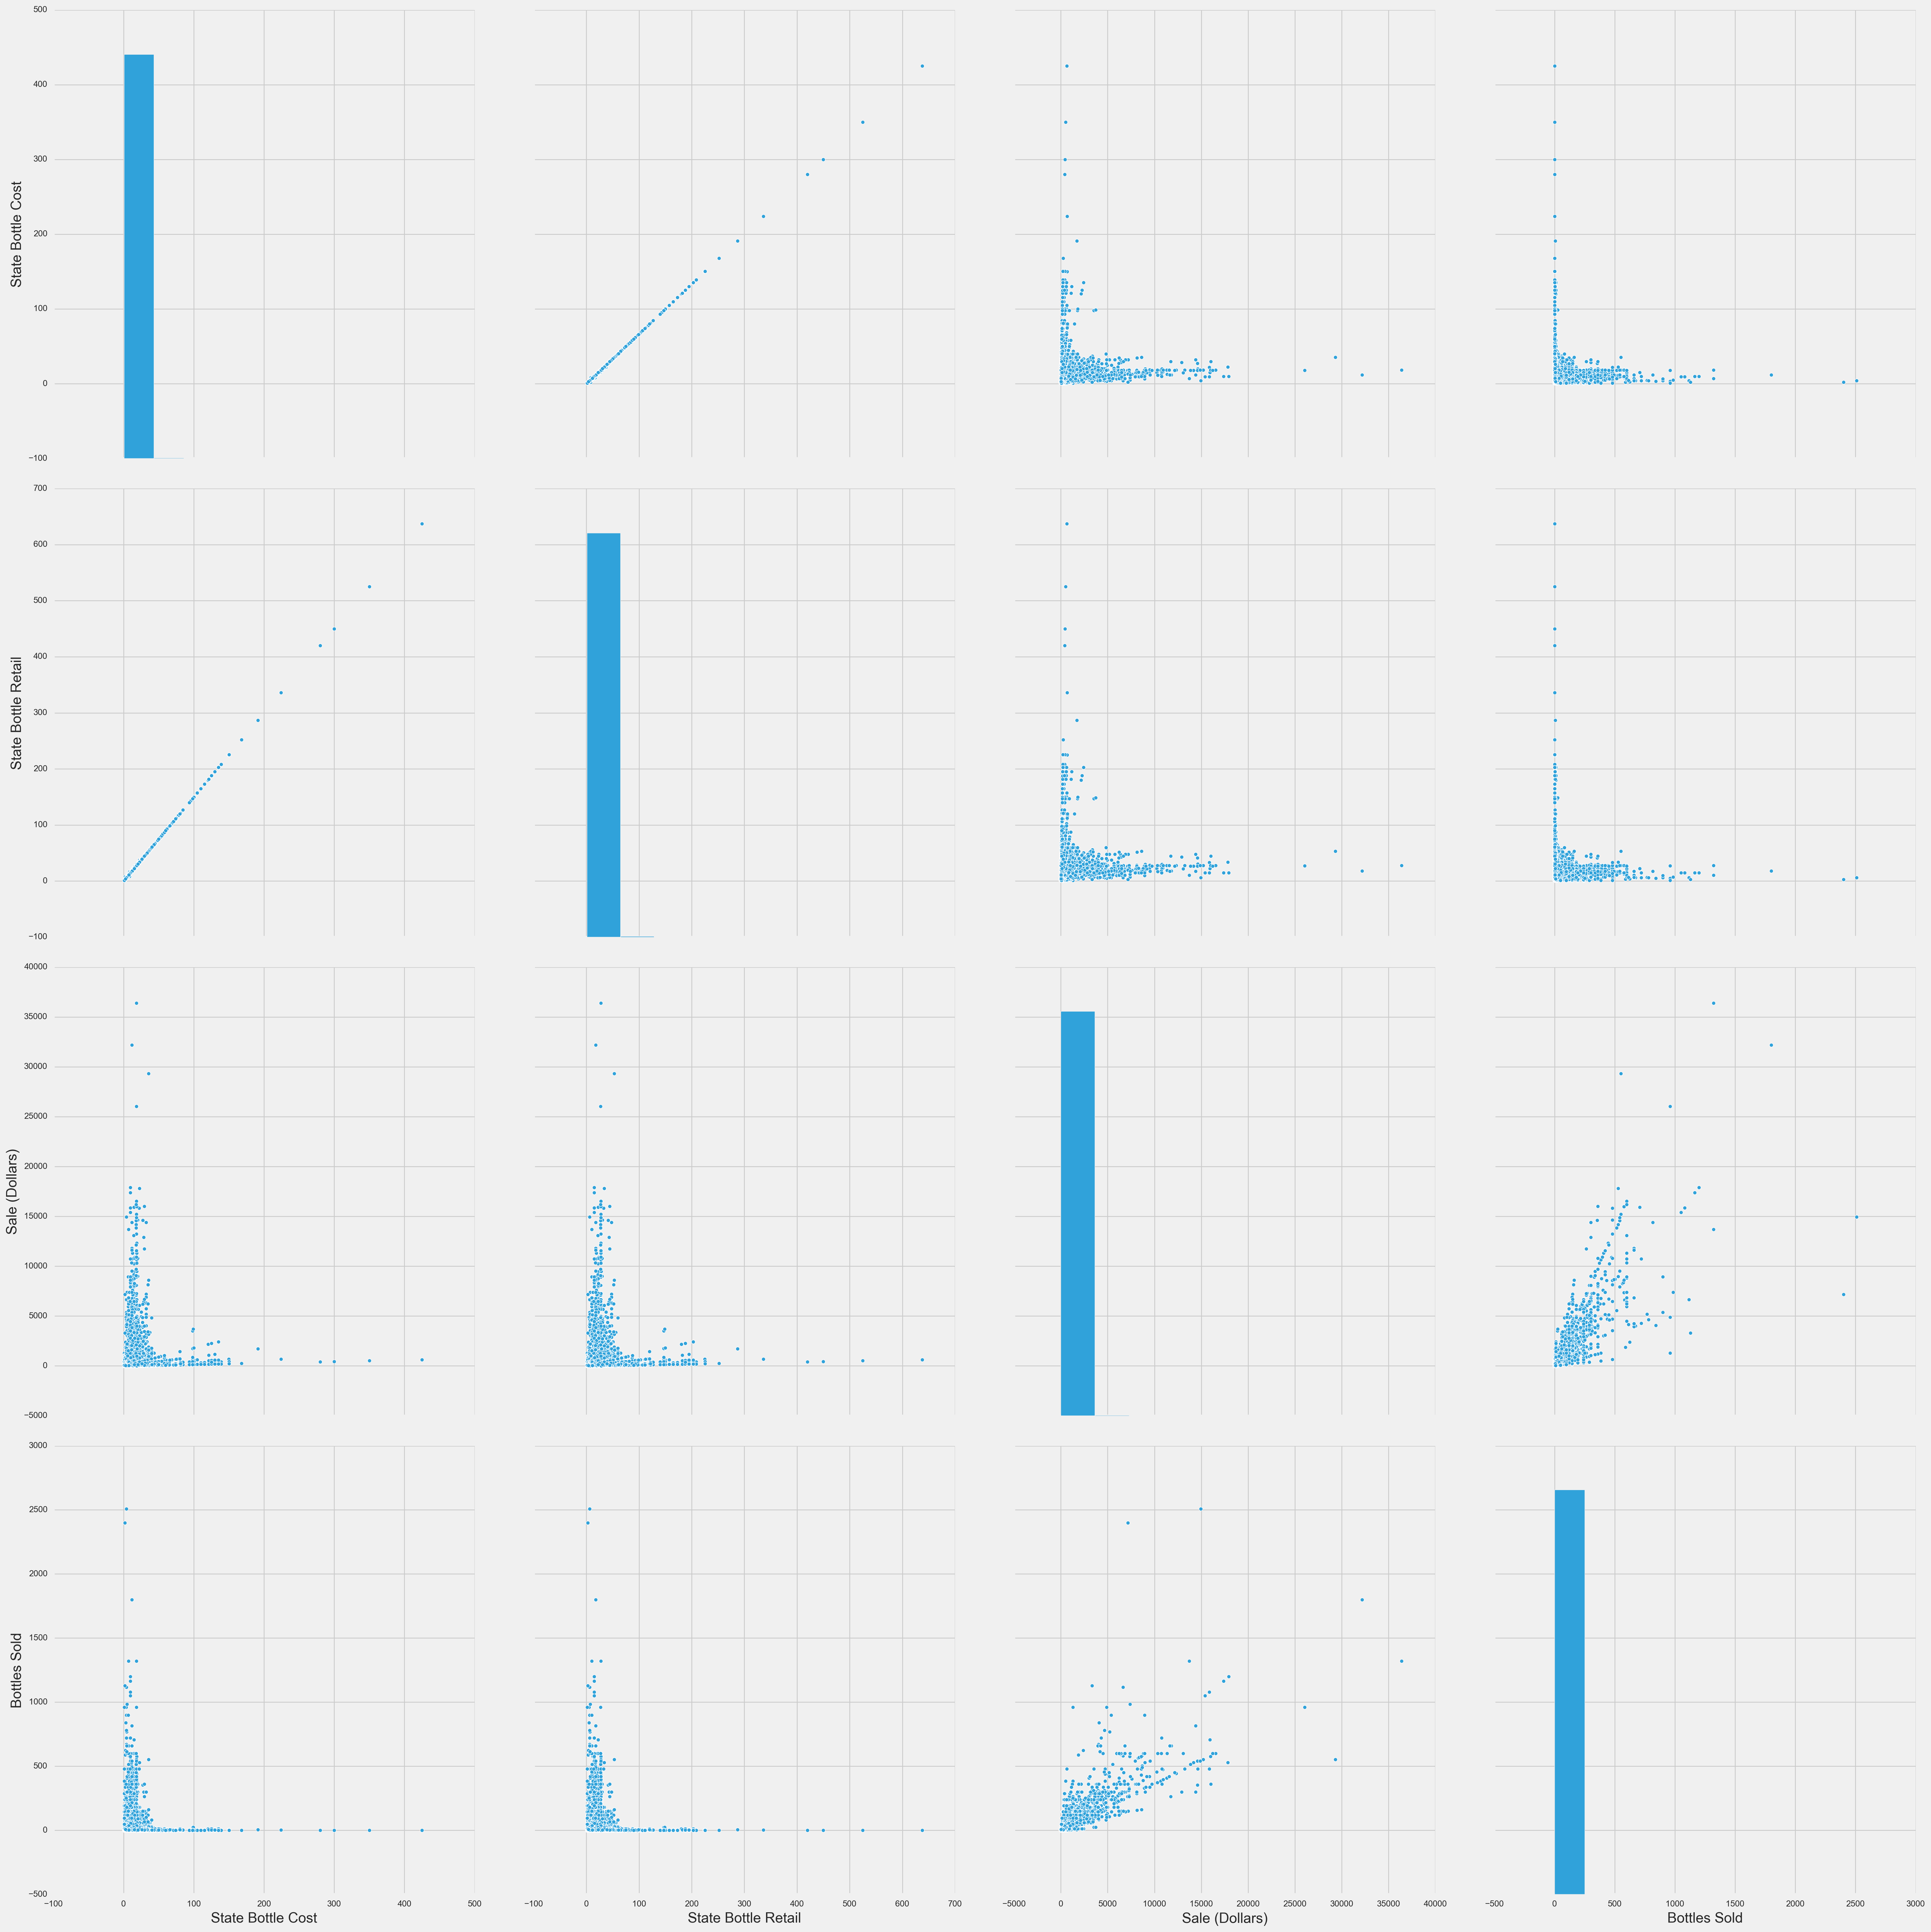

In [10]:
sns.pairplot(data=dfCH, 
             vars=['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)','Bottles Sold'], size=8)
plt.tight_layout()
plt.show()
## code from Lectures : OLS_CV_Regularization_demo

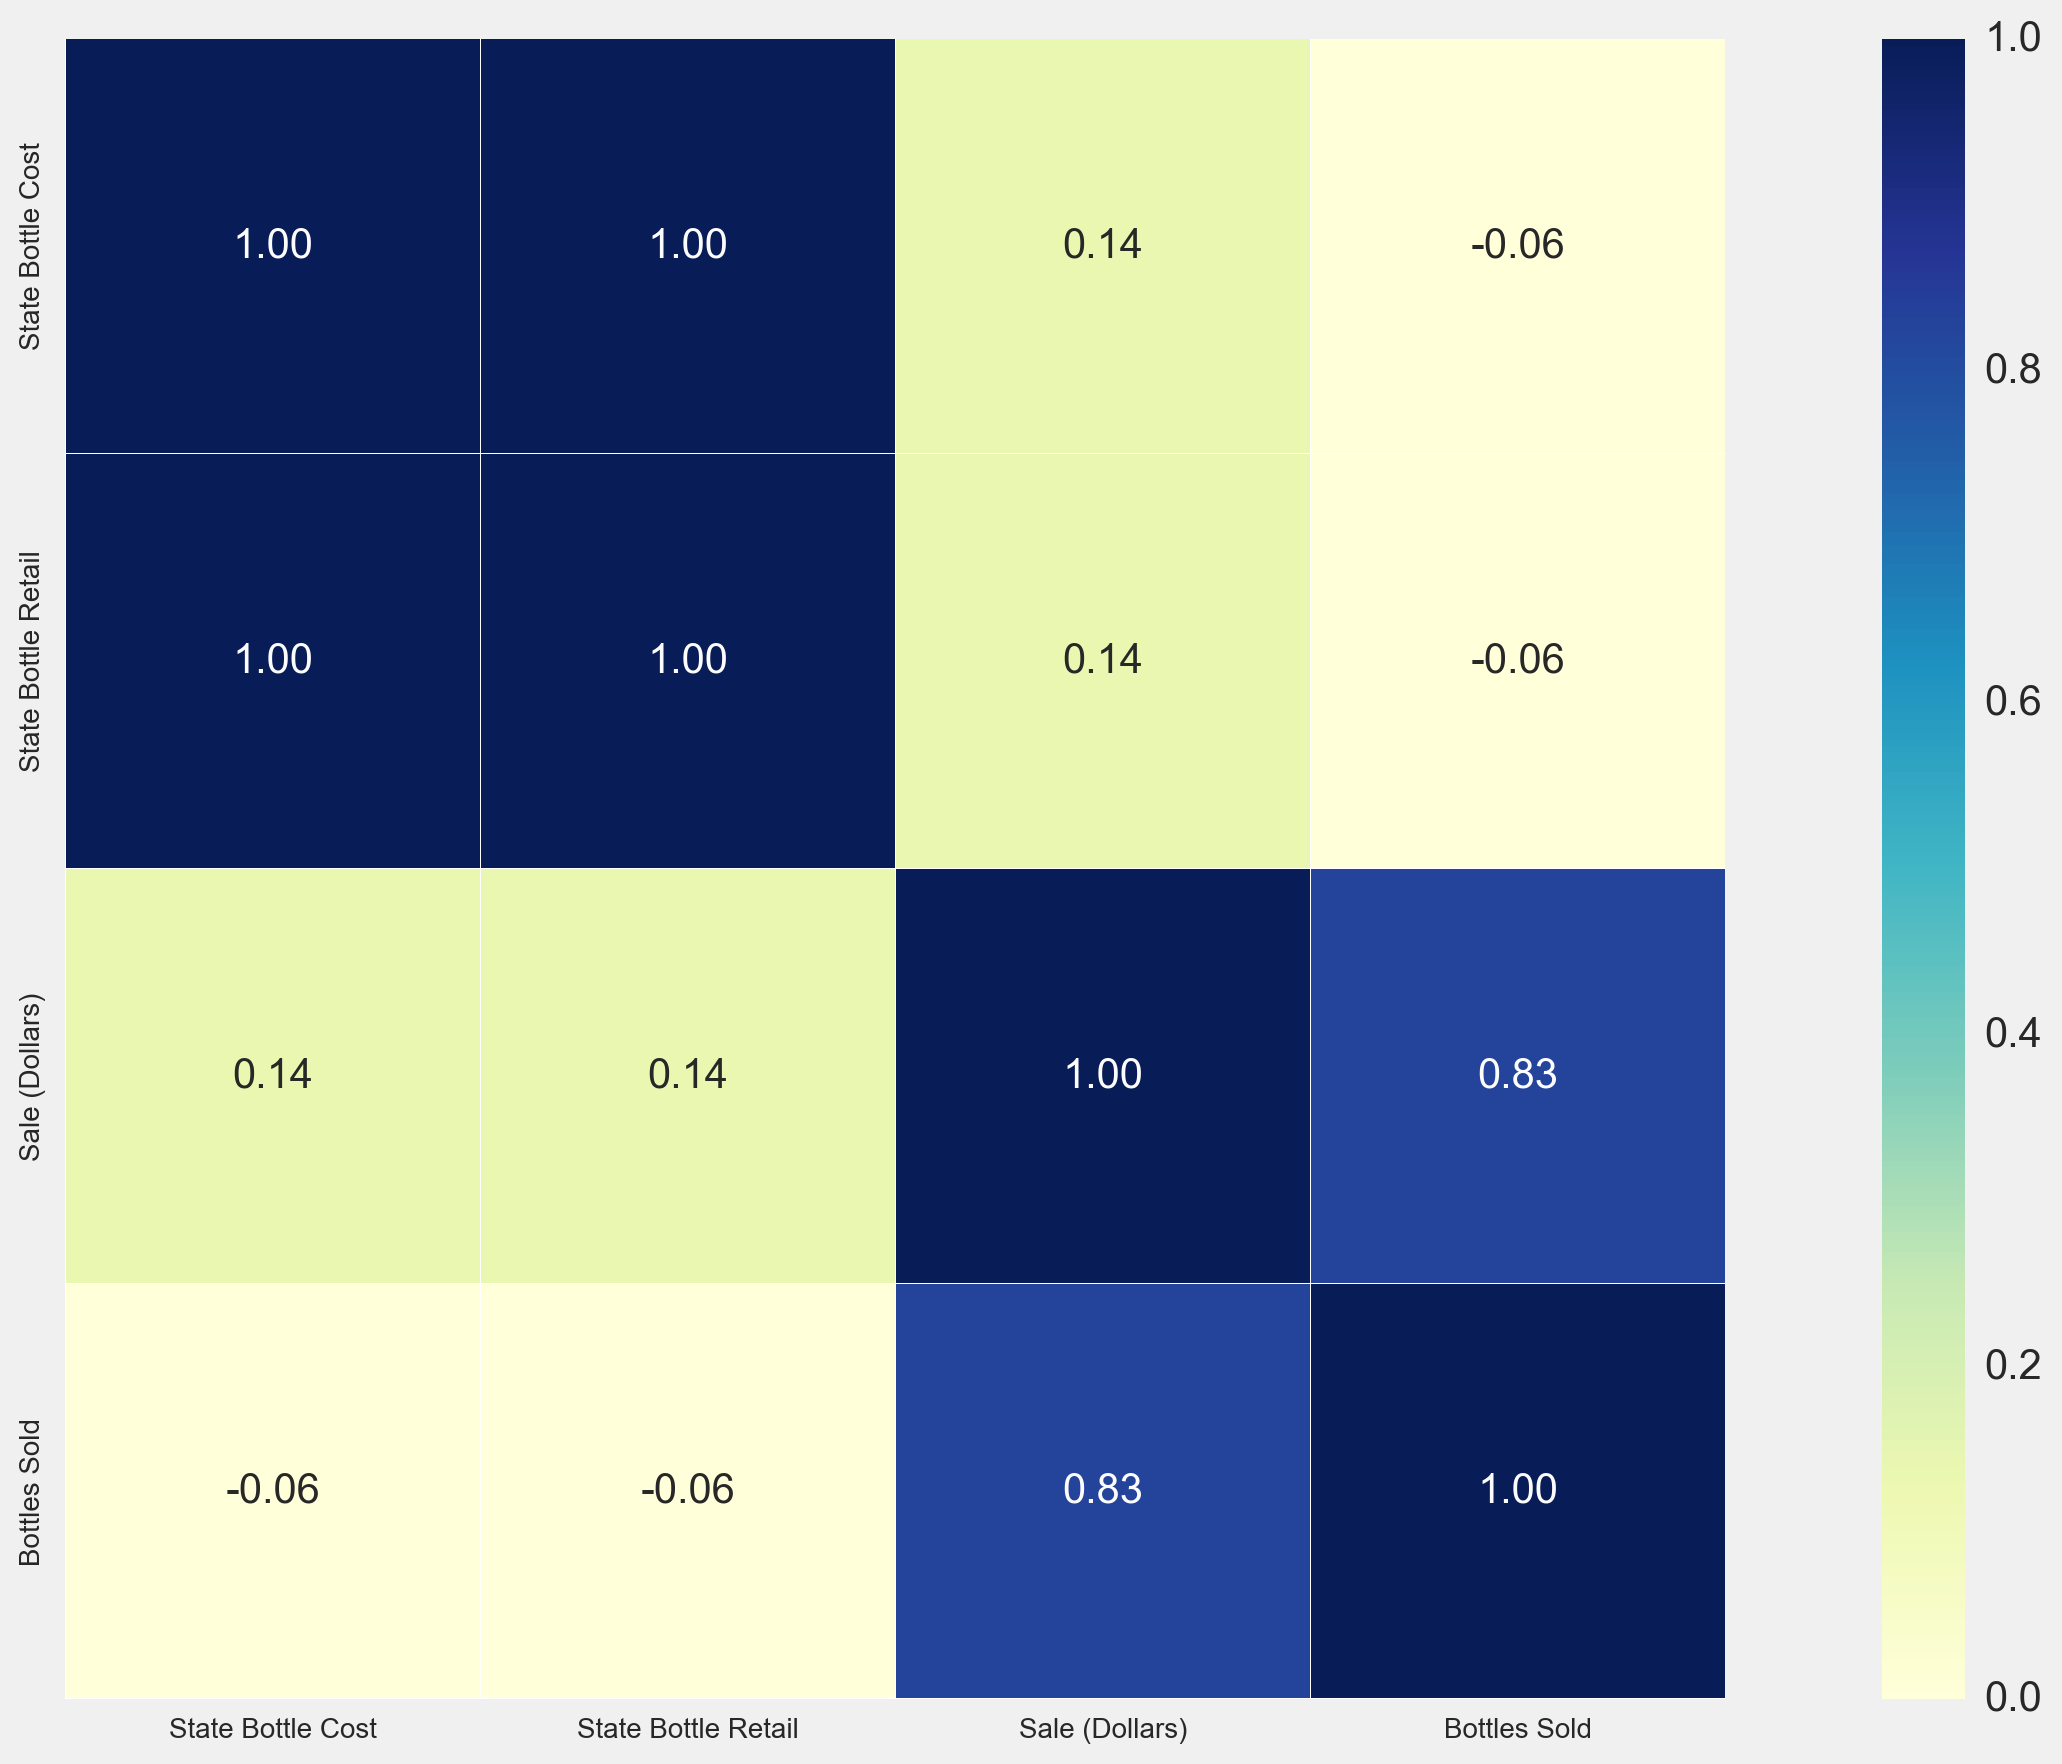

In [11]:
cols = ['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)', 'Bottles Sold']
fig = plt.figure(figsize=(18,10))
ax = fig.gca()

cm = np.corrcoef(dfCH[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 cmap="YlGnBu", 
                 vmin=0, 
                 vmax=1,
                 linewidths= .15, 
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)
plt.show()
## code from Lectures : OLS_CV_Regularization_demo
## see the correlation heat map set of variables from dataset
## from the graph, we can see corr(State Bottle Cost,State Bottle Cost)=1, and corr(Bottle sold,Sales) =0.83, which means the number of sold bottle is high correlated with the Sales of liquior.   

In [508]:
## After check correlation and heat map, Restart clean dataset
## STEP1: convert the Date column to 'datatime' datatype.
## STEP2: sort the datetime
dfCH['Date']=pd.to_datetime(dfCH['Date'])
dfCH1=dfCH.sort('Date')
dfCH1

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
93978,2015-01-05,4303,MEDIAPOLIS,52637,29.0,Des Moines,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,2.75,4.13,4,16.52,0.80,0.21
58330,2015-01-05,2650,HARLAN,51537,83.0,Shelby,1032080.0,IMPORTED VODKA,420,34162,Belvedere Vodka,1000,20.63,30.95,3,92.85,3.00,0.79
1357,2015-01-05,2613,COUNCIL BLUFFS,51501,78.0,Pottawattamie,1031090.0,OTHER PROOF VODKA,260,40926,Smirnoff Silver Vodka 90 Prf,750,7.86,11.79,2,23.58,1.50,0.40
58366,2015-01-05,4806,WEST LIBERTY,52776,70.0,Muscatine,1032200.0,IMPORTED VODKA - MISC,260,64750,Ciroc Coconut,750,19.00,28.50,12,342.00,9.00,2.38
266308,2015-01-05,2650,HARLAN,51537,83.0,Shelby,1031080.0,VODKA 80 PROOF,301,38176,Titos Vodka,750,9.65,14.48,4,57.92,3.00,0.79
126058,2015-01-05,3618,CEDAR RAPIDS,52404,57.0,Linn,1012100.0,CANADIAN WHISKIES,115,11788,Black Velvet,1750,10.45,15.68,72,1128.96,126.00,33.29
126048,2015-01-05,2666,ANKENY,50023,77.0,Polk,1062050.0,BARBADOS RUM,305,42204,Blue Chair Bay Banana,750,9.42,14.13,2,28.26,1.50,0.40
32466,2015-01-05,2647,CEDAR RAPIDS,52411,57.0,Linn,1012210.0,SINGLE MALT SCOTCH,370,5037,Glenlivet 12 Yr Malt Scotch,1000,27.49,41.24,2,82.48,2.00,0.53
58525,2015-01-05,4312,COUNCIL BLUFFS,51501,78.0,Pottawattamie,1071100.0,AMERICAN COCKTAILS,395,58838,Jose Cuervo Authentic Lime Margarita,1750,8.20,12.30,6,73.80,10.50,2.77
58535,2015-01-05,4621,MAXWELL,50161,85.0,Story,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,6,64.80,10.50,2.77


In [509]:
##reset the index
dfCH2=dfCH1.reset_index(drop=True)
dfCH2

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-01-05,4303,MEDIAPOLIS,52637,29.0,Des Moines,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,2.75,4.13,4,16.52,0.80,0.21
1,2015-01-05,2650,HARLAN,51537,83.0,Shelby,1032080.0,IMPORTED VODKA,420,34162,Belvedere Vodka,1000,20.63,30.95,3,92.85,3.00,0.79
2,2015-01-05,2613,COUNCIL BLUFFS,51501,78.0,Pottawattamie,1031090.0,OTHER PROOF VODKA,260,40926,Smirnoff Silver Vodka 90 Prf,750,7.86,11.79,2,23.58,1.50,0.40
3,2015-01-05,4806,WEST LIBERTY,52776,70.0,Muscatine,1032200.0,IMPORTED VODKA - MISC,260,64750,Ciroc Coconut,750,19.00,28.50,12,342.00,9.00,2.38
4,2015-01-05,2650,HARLAN,51537,83.0,Shelby,1031080.0,VODKA 80 PROOF,301,38176,Titos Vodka,750,9.65,14.48,4,57.92,3.00,0.79
5,2015-01-05,3618,CEDAR RAPIDS,52404,57.0,Linn,1012100.0,CANADIAN WHISKIES,115,11788,Black Velvet,1750,10.45,15.68,72,1128.96,126.00,33.29
6,2015-01-05,2666,ANKENY,50023,77.0,Polk,1062050.0,BARBADOS RUM,305,42204,Blue Chair Bay Banana,750,9.42,14.13,2,28.26,1.50,0.40
7,2015-01-05,2647,CEDAR RAPIDS,52411,57.0,Linn,1012210.0,SINGLE MALT SCOTCH,370,5037,Glenlivet 12 Yr Malt Scotch,1000,27.49,41.24,2,82.48,2.00,0.53
8,2015-01-05,4312,COUNCIL BLUFFS,51501,78.0,Pottawattamie,1071100.0,AMERICAN COCKTAILS,395,58838,Jose Cuervo Authentic Lime Margarita,1750,8.20,12.30,6,73.80,10.50,2.77
9,2015-01-05,4621,MAXWELL,50161,85.0,Story,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,6,64.80,10.50,2.77


### 3.2 Clean the columns

In [167]:
dfCH2.isnull().sum()
## check null and find there are some missing value. Drop them because compare to 270955 observation, they are very small.

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [149]:
dfCH2.loc[dfCH2['Category'].isnull()]

,Date,Store Number,City,County,Category,Vendor Number,Item Number,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
51794,2015-04-06,2601,FAIRFIELD,Jefferson,NaN,305,900419,12.42,18.63,12,223.56,9.00,2.38
111738,2015-07-13,5102,MOUNT VERNON,Linn,NaN,240,994992,56.00,84.00,3,252.00,2.25,0.59
128331,2015-08-10,3549,FORT MADISON,Lee,NaN,461,3337,10.50,15.75,18,283.50,13.50,3.57
155391,2015-09-23,4677,CORALVILLE,Johnson,NaN,259,927221,49.95,74.93,1,74.93,0.75,0.20
165352,2015-10-12,2584,FORT MADISON,Lee,NaN,35,1488,15.31,22.97,6,137.82,4.50,1.19
165430,2015-10-12,3934,MAQUOKETA,Jackson,NaN,259,59100,4.46,6.69,24,160.56,18.00,4.76
165482,2015-10-12,3833,ATLANTIC,Cass,NaN,259,59100,4.46,6.69,24,160.56,18.00,4.76
165561,2015-10-12,4114,ATLANTIC,Cass,NaN,35,1475,13.50,20.25,6,121.50,4.50,1.19
165651,2015-10-12,3868,MARION,Linn,NaN,259,59100,4.46,6.69,1,6.69,0.75,0.20
165658,2015-10-12,4098,WASHINGTON,Washington,NaN,259,59100,4.46,6.69,24,160.56,18.00,4.76


In [150]:
dfCH2.loc[dfCH2['County'].isnull()]

,Date,Store Number,City,County,Category,Vendor Number,Item Number,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1549,2015-01-06,4247,BELMOND,NaN,1062300.0,35,43136,8.50,12.75,1,12.75,0.75,0.20
1645,2015-01-06,4247,BELMOND,NaN,1062200.0,434,45246,4.34,6.51,12,78.12,9.00,2.38
1742,2015-01-06,4247,BELMOND,NaN,1032200.0,370,34190,11.49,17.24,1,17.24,0.75,0.20
2352,2015-01-06,4247,BELMOND,NaN,1022100.0,421,88768,12.64,18.96,1,18.96,1.75,0.46
2362,2015-01-06,4247,BELMOND,NaN,1031200.0,205,40599,6.90,10.35,1,10.35,0.75,0.20
5766,2015-01-13,4247,BELMOND,NaN,1071100.0,55,57148,6.00,9.25,6,55.50,10.50,2.77
6737,2015-01-13,4247,BELMOND,NaN,1032080.0,370,34007,14.99,22.49,1,22.49,1.00,0.26
13543,2015-01-27,4247,BELMOND,NaN,1031080.0,260,38008,14.75,22.13,6,132.78,10.50,2.77
13945,2015-01-27,4247,BELMOND,NaN,1012100.0,115,11788,10.45,15.68,12,188.16,21.00,5.55
17589,2015-02-03,4247,BELMOND,NaN,1071100.0,395,58836,4.62,6.93,12,83.16,9.00,2.38


In [168]:
dfCH3=dfCH2.dropna(how='any')

In [169]:
## check again 
dfCH3.isnull().sum()

Date                     0
Store Number             0
City                     0
Zip Code                 0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [430]:
## Drop the columns which are not important.
dfCH33=dfCH3.drop(['Zip Code','County Number','Item Number', 'Bottle Volume (ml)','Vendor Number'] ,axis=1)
dfCH33

,Date,Store Number,City,County,Category,Category Name,Item Description,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-01-05,4303,MEDIAPOLIS,Des Moines,1031080.0,VODKA 80 PROOF,Smirnoff Vodka 80 Prf,2.75,4.13,4,16.52,0.80,0.21
1,2015-01-05,2650,HARLAN,Shelby,1032080.0,IMPORTED VODKA,Belvedere Vodka,20.63,30.95,3,92.85,3.00,0.79
2,2015-01-05,2613,COUNCIL BLUFFS,Pottawattamie,1031090.0,OTHER PROOF VODKA,Smirnoff Silver Vodka 90 Prf,7.86,11.79,2,23.58,1.50,0.40
3,2015-01-05,4806,WEST LIBERTY,Muscatine,1032200.0,IMPORTED VODKA - MISC,Ciroc Coconut,19.00,28.50,12,342.00,9.00,2.38
4,2015-01-05,2650,HARLAN,Shelby,1031080.0,VODKA 80 PROOF,Titos Vodka,9.65,14.48,4,57.92,3.00,0.79
5,2015-01-05,3618,CEDAR RAPIDS,Linn,1012100.0,CANADIAN WHISKIES,Black Velvet,10.45,15.68,72,1128.96,126.00,33.29
6,2015-01-05,2666,ANKENY,Polk,1062050.0,BARBADOS RUM,Blue Chair Bay Banana,9.42,14.13,2,28.26,1.50,0.40
7,2015-01-05,2647,CEDAR RAPIDS,Linn,1012210.0,SINGLE MALT SCOTCH,Glenlivet 12 Yr Malt Scotch,27.49,41.24,2,82.48,2.00,0.53
8,2015-01-05,4312,COUNCIL BLUFFS,Pottawattamie,1071100.0,AMERICAN COCKTAILS,Jose Cuervo Authentic Lime Margarita,8.20,12.30,6,73.80,10.50,2.77
9,2015-01-05,4621,MAXWELL,Story,1031080.0,VODKA 80 PROOF,Five O'clock Vodka,7.20,10.80,6,64.80,10.50,2.77



## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [419]:
dfCH4=dfCH33
dfCH4

,Date,Store Number,City,County,Category,Category Name,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-01-05,4303,MEDIAPOLIS,Des Moines,1031080.0,VODKA 80 PROOF,2.75,4.13,4,16.52,0.80,0.21
1,2015-01-05,2650,HARLAN,Shelby,1032080.0,IMPORTED VODKA,20.63,30.95,3,92.85,3.00,0.79
2,2015-01-05,2613,COUNCIL BLUFFS,Pottawattamie,1031090.0,OTHER PROOF VODKA,7.86,11.79,2,23.58,1.50,0.40
3,2015-01-05,4806,WEST LIBERTY,Muscatine,1032200.0,IMPORTED VODKA - MISC,19.00,28.50,12,342.00,9.00,2.38
4,2015-01-05,2650,HARLAN,Shelby,1031080.0,VODKA 80 PROOF,9.65,14.48,4,57.92,3.00,0.79
5,2015-01-05,3618,CEDAR RAPIDS,Linn,1012100.0,CANADIAN WHISKIES,10.45,15.68,72,1128.96,126.00,33.29
6,2015-01-05,2666,ANKENY,Polk,1062050.0,BARBADOS RUM,9.42,14.13,2,28.26,1.50,0.40
7,2015-01-05,2647,CEDAR RAPIDS,Linn,1012210.0,SINGLE MALT SCOTCH,27.49,41.24,2,82.48,2.00,0.53
8,2015-01-05,4312,COUNCIL BLUFFS,Pottawattamie,1071100.0,AMERICAN COCKTAILS,8.20,12.30,6,73.80,10.50,2.77
9,2015-01-05,4621,MAXWELL,Story,1031080.0,VODKA 80 PROOF,7.20,10.80,6,64.80,10.50,2.77


In [421]:
##import datetime, seperate "Date" into "year" and "month".
import datetime
from datetime import date
dfCH4['Date'] = pd.to_datetime(dfCH4['Date'])
dfCH4['Year'] = dfCH4['Date'].dt.year
dfCH4['Month'] = dfCH4['Date'].dt.month
dfCH4

,Date,Store Number,City,County,Category,Category Name,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,Year,Month
0,2015-01-05,4303,MEDIAPOLIS,Des Moines,1031080.0,VODKA 80 PROOF,2.75,4.13,4,16.52,0.80,0.21,2015,1,2015,1
1,2015-01-05,2650,HARLAN,Shelby,1032080.0,IMPORTED VODKA,20.63,30.95,3,92.85,3.00,0.79,2015,1,2015,1
2,2015-01-05,2613,COUNCIL BLUFFS,Pottawattamie,1031090.0,OTHER PROOF VODKA,7.86,11.79,2,23.58,1.50,0.40,2015,1,2015,1
3,2015-01-05,4806,WEST LIBERTY,Muscatine,1032200.0,IMPORTED VODKA - MISC,19.00,28.50,12,342.00,9.00,2.38,2015,1,2015,1
4,2015-01-05,2650,HARLAN,Shelby,1031080.0,VODKA 80 PROOF,9.65,14.48,4,57.92,3.00,0.79,2015,1,2015,1
5,2015-01-05,3618,CEDAR RAPIDS,Linn,1012100.0,CANADIAN WHISKIES,10.45,15.68,72,1128.96,126.00,33.29,2015,1,2015,1
6,2015-01-05,2666,ANKENY,Polk,1062050.0,BARBADOS RUM,9.42,14.13,2,28.26,1.50,0.40,2015,1,2015,1
7,2015-01-05,2647,CEDAR RAPIDS,Linn,1012210.0,SINGLE MALT SCOTCH,27.49,41.24,2,82.48,2.00,0.53,2015,1,2015,1
8,2015-01-05,4312,COUNCIL BLUFFS,Pottawattamie,1071100.0,AMERICAN COCKTAILS,8.20,12.30,6,73.80,10.50,2.77,2015,1,2015,1
9,2015-01-05,4621,MAXWELL,Story,1031080.0,VODKA 80 PROOF,7.20,10.80,6,64.80,10.50,2.77,2015,1,2015,1


In [427]:
## Make a mask of year 2015,and find out each store's open month in 2015
## code nunique() from http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.Series.nunique.html 
dfCH4_2015=dfCH4[dfCH4['Year']==2015]
dfCH4_Month= dfCH4_2015.groupby(['Store Number','Year'])['Month'].nunique().reset_index()
dfCH4_Month

,Store Number,Year,Month
0,2106,2015,12
1,2113,2015,12
2,2130,2015,12
3,2152,2015,12
4,2178,2015,12
5,2190,2015,12
6,2191,2015,12
7,2200,2015,12
8,2205,2015,12
9,2228,2015,12


In [ ]:
## From the sheet, we can see the problematic stores in 2015.
## Since we will not have any model in this project and when we predict profit these data is helpful, I will keep these problematic stores data.
## However, if we focus on modeling, I will drop these data for further research.


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [181]:
dfCH33.T

,0,1,2,3,4,5,6,7,8,9,...,270944,270946,270947,270948,270949,270950,270951,270952,270953,270954
Date,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,...,2016-03-31 00:00:00,2016-03-31 00:00:00,2016-03-31 00:00:00,2016-03-31 00:00:00,2016-03-31 00:00:00,2016-03-31 00:00:00,2016-03-31 00:00:00,2016-03-31 00:00:00,2016-03-31 00:00:00,2016-03-31 00:00:00
Store Number,4303,2650,2613,4806,2650,3618,2666,2647,4312,4621,...,4185,2668,5102,2248,2626,3713,4900,4320,3456,4893
City,MEDIAPOLIS,HARLAN,COUNCIL BLUFFS,WEST LIBERTY,HARLAN,CEDAR RAPIDS,ANKENY,CEDAR RAPIDS,COUNCIL BLUFFS,MAXWELL,...,GRINNELL,LEON,MOUNT VERNON,DES MOINES,DES MOINES,MASON CITY,WATERLOO,PERRY,CLEAR LAKE,WEST DES MOINES
County,Des Moines,Shelby,Pottawattamie,Muscatine,Shelby,Linn,Polk,Linn,Pottawattamie,Story,...,Poweshiek,Decatur,Linn,Polk,Polk,Cerro Gordo,Black Hawk,Boone,Cerro Gordo,Polk
Category,1.03108e+06,1.03208e+06,1.03109e+06,1.0322e+06,1.03108e+06,1.0121e+06,1.06205e+06,1.01221e+06,1.0711e+06,1.03108e+06,...,1.0122e+06,1.03108e+06,1.0819e+06,1.0221e+06,1.0112e+06,1.0113e+06,1.03108e+06,1.03108e+06,1.03108e+06,1.0816e+06
Category Name,VODKA 80 PROOF,IMPORTED VODKA,OTHER PROOF VODKA,IMPORTED VODKA - MISC,VODKA 80 PROOF,CANADIAN WHISKIES,BARBADOS RUM,SINGLE MALT SCOTCH,AMERICAN COCKTAILS,VODKA 80 PROOF,...,SCOTCH WHISKIES,VODKA 80 PROOF,MISC. AMERICAN CORDIALS & LIQUEURS,TEQUILA,STRAIGHT BOURBON WHISKIES,TENNESSEE WHISKIES,VODKA 80 PROOF,VODKA 80 PROOF,VODKA 80 PROOF,WHISKEY LIQUEUR
State Bottle Cost,2.75,20.63,7.86,19,9.65,10.45,9.42,27.49,8.2,7.2,...,10.5,3.34,5.25,6.6,7.47,29.67,14.75,3.34,7.47,8.98
State Bottle Retail,4.13,30.95,11.79,28.5,14.48,15.68,14.13,41.24,12.3,10.8,...,15.75,5.01,7.88,9.9,11.21,44.51,22.13,5.01,11.21,13.47
Bottles Sold,4,3,2,12,4,72,2,2,6,6,...,12,3,12,12,12,6,2,12,6,6
Sale (Dollars),16.52,92.85,23.58,342,57.92,1128.96,28.26,82.48,73.8,64.8,...,189,15.03,94.56,118.8,134.52,267.06,44.26,60.12,67.26,80.82


In [177]:
## To calculate the yearly liquor sales, we only need Date, Bottles Sold and Sale(Dollars).
## Drop the columns which are not important.
dfCH51=dfCH3.drop(['Bottles Sold','County','City','Category','Vendor Number','Item Number','State Bottle Cost', 'Volume Sold (Liters)','Volume Sold (Gallons)','City','State Bottle Retail','Item Description','Category Name','Zip Code'] ,axis=1)
dfCH51

,Date,Store Number,Zip Code,County Number,Bottle Volume (ml),Sale (Dollars)
0,2015-01-05,4303,52637,29.0,200,16.52
1,2015-01-05,2650,51537,83.0,1000,92.85
2,2015-01-05,2613,51501,78.0,750,23.58
3,2015-01-05,4806,52776,70.0,750,342.00
4,2015-01-05,2650,51537,83.0,750,57.92
5,2015-01-05,3618,52404,57.0,1750,1128.96
6,2015-01-05,2666,50023,77.0,750,28.26
7,2015-01-05,2647,52411,57.0,1000,82.48
8,2015-01-05,4312,51501,78.0,1750,73.80
9,2015-01-05,4621,50161,85.0,1750,64.80


In [70]:
dfCH51['Year'] = dfCH51['Date'].apply(lambda x: x.strftime('%Y')) 
dfCH51

,Date,Store Number,Sale (Dollars),Year
0,2015-01-05,4303,16.52,2015
1,2015-01-05,2650,92.85,2015
2,2015-01-05,2613,23.58,2015
3,2015-01-05,4806,342.00,2015
4,2015-01-05,2650,57.92,2015
5,2015-01-05,3618,1128.96,2015
6,2015-01-05,2666,28.26,2015
7,2015-01-05,2647,82.48,2015
8,2015-01-05,4312,73.80,2015
9,2015-01-05,4621,64.80,2015


In [72]:
df1=dfCH51.groupby( ['Year','Store Number'])[ ['Sale (Dollars)'] ].sum()
df1

Sale (Dollars)
Year Store Number                
2015 2106               146326.22
     2113                 9310.22
     2130               111871.43
     2152                 7721.08
     2178                24324.18
     2190               121689.06
     2191               125093.49
     2200                22811.55
     2205                24623.01
     2228                17462.07
     2233                29553.34
     2238                11762.56
     2248                67682.06
     2285                76927.11
     2290                56514.43
     2327                10245.14
     2353                53349.19
     2367                 5010.83
     2413                90065.02
     2445                 7189.48
     2448                17740.70
     2459                 7352.33
     2460                33731.76
     2465                25831.80
     2475                10681.07
     2478                19840.65
     2487                28900.96
     2498                 2259.67
     2500               149121.63
     2501               144833.66
...                           ...
2016 5181                  415.92
     5182                  232.18
     5183                  182.16
     5185                  508.68
     5186                  340.80
     5187                 1389.60
     5188                  726.90
     5189                   68.40
     5190                 1722.91
     5191                  164.76
     5192                   33.60
     5195                   92.50
     5196                  292.28
     5198                 7058.99
     5199                 3250.40
     5202                  407.61
     5203                 2988.03
     5204                 1793.26
     5205                  323.14
     5206                 2211.73
     5207                 5455.23
     5211                 1210.13
     5212                  778.84
     5213                  462.38
     5215                 2207.05
     9001                  708.24
     9002                 1382.64
     9010                  177.48
     9013                  361.56
     9023                  633.36

[2652 rows x 1 columns]

### 5.2 Calculate the profit each store is making in 2015.


In [73]:
dfCH52=dfCH3.drop(['State Bottle Retail','County','City','Category','Vendor Number','Item Number', 'Volume Sold (Liters)','Volume Sold (Gallons)','City',] ,axis=1)
dfCH52

,Date,Store Number,State Bottle Cost,Bottles Sold,Sale (Dollars)
0,2015-01-05,4303,2.75,4,16.52
1,2015-01-05,2650,20.63,3,92.85
2,2015-01-05,2613,7.86,2,23.58
3,2015-01-05,4806,19.00,12,342.00
4,2015-01-05,2650,9.65,4,57.92
5,2015-01-05,3618,10.45,72,1128.96
6,2015-01-05,2666,9.42,2,28.26
7,2015-01-05,2647,27.49,2,82.48
8,2015-01-05,4312,8.20,6,73.80
9,2015-01-05,4621,7.20,6,64.80


In [74]:
dfCH52['Total Cost'] =dfCH52['State Bottle Cost'] * dfCH52['Bottles Sold'] 
dfCH52['Total Profit'] =dfCH52['Sale (Dollars)'] - dfCH52['Total Cost'] 
dfCH52

,Date,Store Number,State Bottle Cost,Bottles Sold,Sale (Dollars),Total Cost,Total Profit
0,2015-01-05,4303,2.75,4,16.52,11.00,5.52
1,2015-01-05,2650,20.63,3,92.85,61.89,30.96
2,2015-01-05,2613,7.86,2,23.58,15.72,7.86
3,2015-01-05,4806,19.00,12,342.00,228.00,114.00
4,2015-01-05,2650,9.65,4,57.92,38.60,19.32
5,2015-01-05,3618,10.45,72,1128.96,752.40,376.56
6,2015-01-05,2666,9.42,2,28.26,18.84,9.42
7,2015-01-05,2647,27.49,2,82.48,54.98,27.50
8,2015-01-05,4312,8.20,6,73.80,49.20,24.60
9,2015-01-05,4621,7.20,6,64.80,43.20,21.60


In [75]:
dfCH52['Year'] = dfCH52['Date'].apply(lambda x: x.strftime('%Y')) 
dfCH52

,Date,Store Number,State Bottle Cost,Bottles Sold,Sale (Dollars),Total Cost,Total Profit,Year
0,2015-01-05,4303,2.75,4,16.52,11.00,5.52,2015
1,2015-01-05,2650,20.63,3,92.85,61.89,30.96,2015
2,2015-01-05,2613,7.86,2,23.58,15.72,7.86,2015
3,2015-01-05,4806,19.00,12,342.00,228.00,114.00,2015
4,2015-01-05,2650,9.65,4,57.92,38.60,19.32,2015
5,2015-01-05,3618,10.45,72,1128.96,752.40,376.56,2015
6,2015-01-05,2666,9.42,2,28.26,18.84,9.42,2015
7,2015-01-05,2647,27.49,2,82.48,54.98,27.50,2015
8,2015-01-05,4312,8.20,6,73.80,49.20,24.60,2015
9,2015-01-05,4621,7.20,6,64.80,43.20,21.60,2015


In [76]:
dfCH52=dfCH52.drop(['Date','Total Cost','State Bottle Cost','Bottles Sold'] ,axis=1)
dfCH52

,Store Number,Sale (Dollars),Total Profit,Year
0,4303,16.52,5.52,2015
1,2650,92.85,30.96,2015
2,2613,23.58,7.86,2015
3,4806,342.00,114.00,2015
4,2650,57.92,19.32,2015
5,3618,1128.96,376.56,2015
6,2666,28.26,9.42,2015
7,2647,82.48,27.50,2015
8,4312,73.80,24.60,2015
9,4621,64.80,21.60,2015


In [78]:
## make a mask to see the data only in 2015
df_52=dfCH52['Year'] == "2015"
df52=dfCH52[df_52]
df52

,Store Number,Sale (Dollars),Total Profit,Year
0,4303,16.52,5.52,2015
1,2650,92.85,30.96,2015
2,2613,23.58,7.86,2015
3,4806,342.00,114.00,2015
4,2650,57.92,19.32,2015
5,3618,1128.96,376.56,2015
6,2666,28.26,9.42,2015
7,2647,82.48,27.50,2015
8,4312,73.80,24.60,2015
9,4621,64.80,21.60,2015


In [79]:
df52=df52.groupby(['Store Number']) [ ['Total Profit'] ].sum()
df52

,Total Profit
Store Number,
2106,48838.08
2113,3109.04
2130,37325.20
2152,2587.53
2178,8165.70
2190,40617.73
2191,41744.39
2200,7653.47
2205,8224.67


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [90]:
dfCH53=dfCH3.drop(['State Bottle Retail','Store Number','City','Category','Vendor Number','Item Number', 'Volume Sold (Liters)','Volume Sold (Gallons)','City',] ,axis=1)
dfCH53

,Date,County,State Bottle Cost,Bottles Sold,Sale (Dollars)
0,2015-01-05,Des Moines,2.75,4,16.52
1,2015-01-05,Shelby,20.63,3,92.85
2,2015-01-05,Pottawattamie,7.86,2,23.58
3,2015-01-05,Muscatine,19.00,12,342.00
4,2015-01-05,Shelby,9.65,4,57.92
5,2015-01-05,Linn,10.45,72,1128.96
6,2015-01-05,Polk,9.42,2,28.26
7,2015-01-05,Linn,27.49,2,82.48
8,2015-01-05,Pottawattamie,8.20,6,73.80
9,2015-01-05,Story,7.20,6,64.80


In [91]:
dfCH53['Total Cost'] =dfCH53['State Bottle Cost'] * dfCH53['Bottles Sold'] 
dfCH53['Total Profit'] =dfCH53['Sale (Dollars)'] - dfCH53['Total Cost'] 
dfCH53

,Date,County,State Bottle Cost,Bottles Sold,Sale (Dollars),Total Cost,Total Profit
0,2015-01-05,Des Moines,2.75,4,16.52,11.00,5.52
1,2015-01-05,Shelby,20.63,3,92.85,61.89,30.96
2,2015-01-05,Pottawattamie,7.86,2,23.58,15.72,7.86
3,2015-01-05,Muscatine,19.00,12,342.00,228.00,114.00
4,2015-01-05,Shelby,9.65,4,57.92,38.60,19.32
5,2015-01-05,Linn,10.45,72,1128.96,752.40,376.56
6,2015-01-05,Polk,9.42,2,28.26,18.84,9.42
7,2015-01-05,Linn,27.49,2,82.48,54.98,27.50
8,2015-01-05,Pottawattamie,8.20,6,73.80,49.20,24.60
9,2015-01-05,Story,7.20,6,64.80,43.20,21.60


In [92]:
dfCH53['Year'] = dfCH53['Date'].apply(lambda x: x.strftime('%Y')) 
dfCH53

,Date,County,State Bottle Cost,Bottles Sold,Sale (Dollars),Total Cost,Total Profit,Year
0,2015-01-05,Des Moines,2.75,4,16.52,11.00,5.52,2015
1,2015-01-05,Shelby,20.63,3,92.85,61.89,30.96,2015
2,2015-01-05,Pottawattamie,7.86,2,23.58,15.72,7.86,2015
3,2015-01-05,Muscatine,19.00,12,342.00,228.00,114.00,2015
4,2015-01-05,Shelby,9.65,4,57.92,38.60,19.32,2015
5,2015-01-05,Linn,10.45,72,1128.96,752.40,376.56,2015
6,2015-01-05,Polk,9.42,2,28.26,18.84,9.42,2015
7,2015-01-05,Linn,27.49,2,82.48,54.98,27.50,2015
8,2015-01-05,Pottawattamie,8.20,6,73.80,49.20,24.60,2015
9,2015-01-05,Story,7.20,6,64.80,43.20,21.60,2015


In [93]:
dfCH53=dfCH53.drop(['Date','Total Cost','State Bottle Cost','Bottles Sold'] ,axis=1)
dfCH53

,County,Sale (Dollars),Total Profit,Year
0,Des Moines,16.52,5.52,2015
1,Shelby,92.85,30.96,2015
2,Pottawattamie,23.58,7.86,2015
3,Muscatine,342.00,114.00,2015
4,Shelby,57.92,19.32,2015
5,Linn,1128.96,376.56,2015
6,Polk,28.26,9.42,2015
7,Linn,82.48,27.50,2015
8,Pottawattamie,73.80,24.60,2015
9,Story,64.80,21.60,2015


In [94]:
df_53=dfCH53['Year'] == "2015"
df53=dfCH53[df_52]
df53

,County,Sale (Dollars),Total Profit,Year
0,Des Moines,16.52,5.52,2015
1,Shelby,92.85,30.96,2015
2,Pottawattamie,23.58,7.86,2015
3,Muscatine,342.00,114.00,2015
4,Shelby,57.92,19.32,2015
5,Linn,1128.96,376.56,2015
6,Polk,28.26,9.42,2015
7,Linn,82.48,27.50,2015
8,Pottawattamie,73.80,24.60,2015
9,Story,64.80,21.60,2015


In [95]:
df53=df53.groupby(['County']) [ ['Total Profit'] ].sum()
df53=df53.sort('Total Profit')
df53

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Total Profit
County,
Fremont,886.86
Adams,3417.67
Wayne,3688.75
Davis,3730.56
Taylor,3928.88
Keokuk,4981.51
Ringgold,5163.41
Decatur,5164.69
Audubon,5515.99


In [36]:
## From the chart, we can see  county Polk making the most profit on liquor per gallon in 2015.

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [453]:
dfCH54=dfCH3.drop(['State Bottle Retail','City','Category','Vendor Number','Item Number', 'Volume Sold (Liters)','City','County'] ,axis=1)
dfCH54

,Date,Store Number,Zip Code,County Number,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,Bottles Sold,Sale (Dollars),Volume Sold (Gallons)
0,2015-01-05,4303,52637,29.0,VODKA 80 PROOF,Smirnoff Vodka 80 Prf,200,2.75,4,16.52,0.21
1,2015-01-05,2650,51537,83.0,IMPORTED VODKA,Belvedere Vodka,1000,20.63,3,92.85,0.79
2,2015-01-05,2613,51501,78.0,OTHER PROOF VODKA,Smirnoff Silver Vodka 90 Prf,750,7.86,2,23.58,0.40
3,2015-01-05,4806,52776,70.0,IMPORTED VODKA - MISC,Ciroc Coconut,750,19.00,12,342.00,2.38
4,2015-01-05,2650,51537,83.0,VODKA 80 PROOF,Titos Vodka,750,9.65,4,57.92,0.79
5,2015-01-05,3618,52404,57.0,CANADIAN WHISKIES,Black Velvet,1750,10.45,72,1128.96,33.29
6,2015-01-05,2666,50023,77.0,BARBADOS RUM,Blue Chair Bay Banana,750,9.42,2,28.26,0.40
7,2015-01-05,2647,52411,57.0,SINGLE MALT SCOTCH,Glenlivet 12 Yr Malt Scotch,1000,27.49,2,82.48,0.53
8,2015-01-05,4312,51501,78.0,AMERICAN COCKTAILS,Jose Cuervo Authentic Lime Margarita,1750,8.20,6,73.80,2.77
9,2015-01-05,4621,50161,85.0,VODKA 80 PROOF,Five O'clock Vodka,1750,7.20,6,64.80,2.77


In [454]:
dfCH54['Total Cost'] =dfCH54['State Bottle Cost'] * dfCH54['Bottles Sold'] 
dfCH54['Total Profit'] =dfCH54['Sale (Dollars)'] - dfCH54['Total Cost'] 
dfCH54['P/S ratio']=dfCH54['Total Profit']/dfCH54['Volume Sold (Gallons)'] 
dfCH54

,Date,Store Number,Zip Code,County Number,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Total Cost,Total Profit,P/S ratio
0,2015-01-05,4303,52637,29.0,VODKA 80 PROOF,Smirnoff Vodka 80 Prf,200,2.75,4,16.52,0.21,11.00,5.52,26.285714
1,2015-01-05,2650,51537,83.0,IMPORTED VODKA,Belvedere Vodka,1000,20.63,3,92.85,0.79,61.89,30.96,39.189873
2,2015-01-05,2613,51501,78.0,OTHER PROOF VODKA,Smirnoff Silver Vodka 90 Prf,750,7.86,2,23.58,0.40,15.72,7.86,19.650000
3,2015-01-05,4806,52776,70.0,IMPORTED VODKA - MISC,Ciroc Coconut,750,19.00,12,342.00,2.38,228.00,114.00,47.899160
4,2015-01-05,2650,51537,83.0,VODKA 80 PROOF,Titos Vodka,750,9.65,4,57.92,0.79,38.60,19.32,24.455696
5,2015-01-05,3618,52404,57.0,CANADIAN WHISKIES,Black Velvet,1750,10.45,72,1128.96,33.29,752.40,376.56,11.311505
6,2015-01-05,2666,50023,77.0,BARBADOS RUM,Blue Chair Bay Banana,750,9.42,2,28.26,0.40,18.84,9.42,23.550000
7,2015-01-05,2647,52411,57.0,SINGLE MALT SCOTCH,Glenlivet 12 Yr Malt Scotch,1000,27.49,2,82.48,0.53,54.98,27.50,51.886792
8,2015-01-05,4312,51501,78.0,AMERICAN COCKTAILS,Jose Cuervo Authentic Lime Margarita,1750,8.20,6,73.80,2.77,49.20,24.60,8.880866
9,2015-01-05,4621,50161,85.0,VODKA 80 PROOF,Five O'clock Vodka,1750,7.20,6,64.80,2.77,43.20,21.60,7.797834


In [455]:
dfCH54['Size of Store']=dfCH54['Volume Sold (Gallons)']
dfCH54

,Date,Store Number,Zip Code,County Number,Category Name,Item Description,Bottle Volume (ml),State Bottle Cost,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Total Cost,Total Profit,P/S ratio,Size of Store
0,2015-01-05,4303,52637,29.0,VODKA 80 PROOF,Smirnoff Vodka 80 Prf,200,2.75,4,16.52,0.21,11.00,5.52,26.285714,0.21
1,2015-01-05,2650,51537,83.0,IMPORTED VODKA,Belvedere Vodka,1000,20.63,3,92.85,0.79,61.89,30.96,39.189873,0.79
2,2015-01-05,2613,51501,78.0,OTHER PROOF VODKA,Smirnoff Silver Vodka 90 Prf,750,7.86,2,23.58,0.40,15.72,7.86,19.650000,0.40
3,2015-01-05,4806,52776,70.0,IMPORTED VODKA - MISC,Ciroc Coconut,750,19.00,12,342.00,2.38,228.00,114.00,47.899160,2.38
4,2015-01-05,2650,51537,83.0,VODKA 80 PROOF,Titos Vodka,750,9.65,4,57.92,0.79,38.60,19.32,24.455696,0.79
5,2015-01-05,3618,52404,57.0,CANADIAN WHISKIES,Black Velvet,1750,10.45,72,1128.96,33.29,752.40,376.56,11.311505,33.29
6,2015-01-05,2666,50023,77.0,BARBADOS RUM,Blue Chair Bay Banana,750,9.42,2,28.26,0.40,18.84,9.42,23.550000,0.40
7,2015-01-05,2647,52411,57.0,SINGLE MALT SCOTCH,Glenlivet 12 Yr Malt Scotch,1000,27.49,2,82.48,0.53,54.98,27.50,51.886792,0.53
8,2015-01-05,4312,51501,78.0,AMERICAN COCKTAILS,Jose Cuervo Authentic Lime Margarita,1750,8.20,6,73.80,2.77,49.20,24.60,8.880866,2.77
9,2015-01-05,4621,50161,85.0,VODKA 80 PROOF,Five O'clock Vodka,1750,7.20,6,64.80,2.77,43.20,21.60,7.797834,2.77


In [456]:
dfCH54=dfCH54.drop(['Date','Total Cost','State Bottle Cost','Bottles Sold','Store Number','Sale (Dollars)','Volume Sold (Gallons)','Bottle Volume (ml)'] ,axis=1)
dfCH54

,Zip Code,County Number,Category Name,Item Description,Total Profit,P/S ratio,Size of Store
0,52637,29.0,VODKA 80 PROOF,Smirnoff Vodka 80 Prf,5.52,26.285714,0.21
1,51537,83.0,IMPORTED VODKA,Belvedere Vodka,30.96,39.189873,0.79
2,51501,78.0,OTHER PROOF VODKA,Smirnoff Silver Vodka 90 Prf,7.86,19.650000,0.40
3,52776,70.0,IMPORTED VODKA - MISC,Ciroc Coconut,114.00,47.899160,2.38
4,51537,83.0,VODKA 80 PROOF,Titos Vodka,19.32,24.455696,0.79
5,52404,57.0,CANADIAN WHISKIES,Black Velvet,376.56,11.311505,33.29
6,50023,77.0,BARBADOS RUM,Blue Chair Bay Banana,9.42,23.550000,0.40
7,52411,57.0,SINGLE MALT SCOTCH,Glenlivet 12 Yr Malt Scotch,27.50,51.886792,0.53
8,51501,78.0,AMERICAN COCKTAILS,Jose Cuervo Authentic Lime Margarita,24.60,8.880866,2.77
9,50161,85.0,VODKA 80 PROOF,Five O'clock Vodka,21.60,7.797834,2.77


In [457]:
dfCH54.corr()

,County Number,Total Profit,P/S ratio,Size of Store
County Number,1.000000,0.019546,0.031248,0.010194
Total Profit,0.019546,1.000000,0.062888,0.851136
P/S ratio,0.031248,0.062888,1.000000,-0.085669
Size of Store,0.010194,0.851136,-0.085669,1.000000


### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [475]:
## 7 basic liquors of cocktail
dfCH55=dfCH54
dfCH55['Category Name']

0                             VODKA 80 PROOF
1                             IMPORTED VODKA
2                          OTHER PROOF VODKA
3                      IMPORTED VODKA - MISC
4                             VODKA 80 PROOF
5                          CANADIAN WHISKIES
6                               BARBADOS RUM
7                         SINGLE MALT SCOTCH
8                         AMERICAN COCKTAILS
9                             VODKA 80 PROOF
10                     BUTTERSCOTCH SCHNAPPS
11                            VODKA 80 PROOF
12                 STRAIGHT BOURBON WHISKIES
13                            VODKA 80 PROOF
14                            VODKA 80 PROOF
15                            VODKA 80 PROOF
16                     STRAIGHT RYE WHISKIES
17                 STRAIGHT BOURBON WHISKIES
18                     IMPORTED VODKA - MISC
19                            VODKA 80 PROOF
20                         AMERICAN AMARETTO
21                         IMPORTED DRY GINS
22        

In [477]:
dfCH55['Liquor Type'] = np.where(dfCH55['Category Name'].str.contains('WHISKIES') ,"WHISKY" ,
    np.where(dfCH55['Category Name'].str.contains('BRANDIES'),"BRANDY" ,
    np.where(dfCH55['Category Name'].str.contains('VODKA'), "VODKA",
    np.where(dfCH55['Category Name'].str.contains('GINS'), "GIN",
    np.where(dfCH55['Category Name'].str.contains('TEQUILA'), "TEQUILA",
    np.where(dfCH55['Category Name'].str.contains('RUM'), "RUM", "OTHER" ))))))
df55=dfCH55.groupby(['Liquor Type']).count()['Category Name'].reset_index()
df55

,Liquor Type,Category Name
0,BRANDY,14978
1,GIN,9882
2,OTHER,59369
3,RUM,32618
4,TEQUILA,12044
5,VODKA,69690
6,WHISKY,70677


### 5.6 Do relationships exist between the broader liquor type and profit?

In [480]:
## Group profit by liquor type and sort it by profit. 
dfCH55.groupby(['Liquor Type'], sort=True)[['Total Profit']].sum().sort_values(by=['Total Profit'], ascending=True).reset_index().T

,0,1,2,3,4,5,6
Liquor Type,GIN,BRANDY,TEQUILA,RUM,OTHER,VODKA,WHISKY
Total Profit,305484,484104,627562,1.52113e+06,2.34794e+06,2.78762e+06,3.52398e+06


In [ ]:
## Whisky was the best type of liquor in 2015. 


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [481]:
## Calculate the profit in 2015 and 2016
dfCH57=dfCH33
dfCH57['Profit']=(dfCH57['State Bottle Retail']-dfCH57['State Bottle Cost'])*dfCH57['Bottles Sold']

In [486]:
## Group the sales and profit by item description
Brand_Sale=dfCH57.groupby(['Item Description']).sum()['Sale (Dollars)'].reset_index()
Brand_Profit=dfCH57.groupby(['Item Description']).sum()['Profit'].reset_index()

In [487]:
## Merge the two dataframes
Brand_Sales_Profit=pd.merge(Brand_Sale,Brand_Profit,on=['Item Description'],how='right')

In [488]:
## Sort it by profit, and find out the top three
Brand_Sales_Profit.sort(['Profit'],ascending=False).head(3)

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Item Description,Sale (Dollars),Profit
270,Black Velvet,1564983.95,534977.44
1052,Jack Daniels Old #7 Black Lbl,1184549.41,394928.32
431,Captain Morgan Spiced Rum,1161892.32,387436.82


In [489]:
Brand_Sales_Profit.corr()

,Sale (Dollars),Profit
Sale (Dollars),1.000000,0.999946
Profit,0.999946,1.000000


In [ ]:
## For different type ofliquor, sales is highly correlated with profit.  

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [497]:
## Group total profit and sales by liquor type, sort it by profit
dfCH58=dfCH55
dfCH58.groupby(['Liquor Type'], sort=True)[['Total Profit','P/S ratio']].sum().sort_values(by=['Total Profit'],ascending=True).reset_index()

,Liquor Type,Total Profit,P/S ratio
0,GIN,3.054843e+05,1.821820e+05
1,BRANDY,4.841044e+05,4.082165e+05
2,TEQUILA,6.275618e+05,4.525179e+05
3,RUM,1.521126e+06,6.044290e+05
4,OTHER,2.347945e+06,1.406308e+06
5,VODKA,2.787620e+06,1.268976e+06
6,WHISKY,3.523984e+06,1.798219e+06


In [ ]:
## Small stores usually sale high profit and high sales liquor, in order to keep these small business running, we should choose low-sales and low-profit liquor to collcet tax.
## As we can see in the chart, Gin and Brandy should be taxed harder than other liquors.


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [408]:
## Q1 2015
dfCH61=dfCH33
## make a mask to see the data only in 2015
DF61=dfCH61[(dfCH61['Date'] >='20150101') & (dfCH61['Date'] <= '20150301')]
DF61['Year'] = DF61['Date'].apply(lambda x: x.strftime('%Y'))
df_61=DF61['Year'] == "2015"
df_61=DF61[df_61]
df_61=df_61.drop(['Year','Store Number','City','Category','Category Name','State Bottle Cost','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','Volume Sold (Gallons)'],axis=1)
df_61

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,County,Sale (Dollars)
0,2015-01-05,Des Moines,16.52
1,2015-01-05,Shelby,92.85
2,2015-01-05,Pottawattamie,23.58
3,2015-01-05,Muscatine,342.00
4,2015-01-05,Shelby,57.92
5,2015-01-05,Linn,1128.96
6,2015-01-05,Polk,28.26
7,2015-01-05,Linn,82.48
8,2015-01-05,Pottawattamie,73.80
9,2015-01-05,Story,64.80


In [310]:
## Q1 2016
dfCH611=dfCH33
## make a mask to see the data only in 2015
DF611=dfCH611[(dfCH611['Date'] >='20160101') & (dfCH61['Date'] <= '20160301')]
DF611['Year'] = DF611['Date'].apply(lambda x: x.strftime('%Y'))
df_611=DF611['Year'] == "2016"
df_611=DF611[df_611]
df_611=df_611.drop(['Year','Store Number','City','Category','Category Name','State Bottle Cost','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','Volume Sold (Gallons)'],axis=1)
df_611

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,County,Sale (Dollars)
218594,2016-01-04,Jasper,7.26
218595,2016-01-04,Van Buren,49.50
218596,2016-01-04,Jefferson,267.06
218597,2016-01-04,Polk,94.20
218598,2016-01-04,Lee,132.00
218599,2016-01-04,Cedar,34.89
218600,2016-01-04,Des Moines,134.64
218601,2016-01-04,Des Moines,60.72
218602,2016-01-04,Black Hawk,124.83
218603,2016-01-04,Linn,54.00


In [312]:
##combine Q1 2015 and Q1 2016
df61=pd.concat([df_61,df_611])
df61

,Date,County,Sale (Dollars)
0,2015-01-05,Des Moines,16.52
1,2015-01-05,Shelby,92.85
2,2015-01-05,Pottawattamie,23.58
3,2015-01-05,Muscatine,342.00
4,2015-01-05,Shelby,57.92
5,2015-01-05,Linn,1128.96
6,2015-01-05,Polk,28.26
7,2015-01-05,Linn,82.48
8,2015-01-05,Pottawattamie,73.80
9,2015-01-05,Story,64.80


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [383]:
dfCH62.rename(columns={'Sale (Dollars)': '2015 sale'}, inplace=True)

In [384]:
dfCH62=df_61.groupby(['County']) [ ['Sale (Dollars)'] ].sum()

dfCH62

,Sale (Dollars)
County,
Adair,6948.14
Adams,1010.65
Allamakee,10742.40
Appanoose,10321.54
Audubon,4025.15
Benton,7344.62
Black Hawk,213899.60
Boone,36334.69
Bremer,23489.47


In [385]:
dfCH622.rename(columns={'Sale (Dollars)': '2016 sale'}, inplace=True)

In [386]:
dfCH622=df_611.groupby(['County']) [ ['Sale (Dollars)'] ].sum()

dfCH622

,Sale (Dollars)
County,
Adair,9052.52
Adams,1241.42
Allamakee,10261.40
Appanoose,14242.55
Audubon,2307.62
Benton,9066.50
Black Hawk,220793.09
Boone,24163.43
Bremer,25721.58


In [387]:
df62=dfCH62.join(dfCH622, lsuffix='_2015', rsuffix='_2016')
df62
## http://stackoverflow.com/questions/22676081/pandas-the-difference-between-join-and-merge

,Sale (Dollars)_2015,Sale (Dollars)_2016
County,,
Adair,6948.14,9052.52
Adams,1010.65,1241.42
Allamakee,10742.40,10261.40
Appanoose,10321.54,14242.55
Audubon,4025.15,2307.62
Benton,7344.62,9066.50
Black Hawk,213899.60,220793.09
Boone,36334.69,24163.43
Bremer,23489.47,25721.58


In [388]:
df62['Profit']=df62['Sale (Dollars)_2016']-df62['Sale (Dollars)_2015']
df62['Profit']=pd.to_numeric(df62['Profit'])
df62

,Sale (Dollars)_2015,Sale (Dollars)_2016,Profit
County,,,
Adair,6948.14,9052.52,2104.38
Adams,1010.65,1241.42,230.77
Allamakee,10742.40,10261.40,-481.00
Appanoose,10321.54,14242.55,3921.01
Audubon,4025.15,2307.62,-1717.53
Benton,7344.62,9066.50,1721.88
Black Hawk,213899.60,220793.09,6893.49
Boone,36334.69,24163.43,-12171.26
Bremer,23489.47,25721.58,2232.11


In [389]:
df62['Profit_sign'] = np.sign(df62.Profit)
df62.groupby(["Profit_sign"]).size()


Profit_sign
-1.0    41
 1.0    58
dtype: int64

In [ ]:
## The owner is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.
## So I calculte sales of 2015 Q1 and sales of 2016 Q1 and then use sales of 2016 minus sales of 2015 to see whether there is a decline sales.
## Profit_sign =1, means there is no decline in liquor sales between Q1 2015 and Q1 2016
## Profit_sign =-1,  means there is a decline in liquor sales between Q1 2015 and Q1 2016.
## As we can see, 58 of the stores sales increased,41 of the stores sales decresed. 

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [ ]:
## I think a new store location should satisfied two situation:
## 1.From 2015Q1 to 2016Q1,sales of liquor increased.
## 2.Top one Sales.

In [395]:
df63=df62
df631=df63.sort('Sale (Dollars)_2016')
df631
 

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Sale (Dollars)_2015,Sale (Dollars)_2016,Profit,Profit_sign
County,,,,
Fremont,350.88,124.20,-226.68,-1.0
Adams,1010.65,1241.42,230.77,1.0
Wayne,1533.44,1497.69,-35.75,-1.0
Davis,1316.35,1562.73,246.38,1.0
Taylor,2676.20,1826.70,-849.50,-1.0
Ringgold,1523.94,1978.85,454.91,1.0
Decatur,3010.09,2253.26,-756.83,-1.0
Audubon,4025.15,2307.62,-1717.53,-1.0
Franklin,8127.52,2627.44,-5500.08,-1.0


In [397]:
df632=df63.sort('Profit')
df632

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Sale (Dollars)_2015,Sale (Dollars)_2016,Profit,Profit_sign
County,,,,
Carroll,43238.27,23137.04,-20101.23,-1.0
Howard,26188.57,6302.35,-19886.22,-1.0
Boone,36334.69,24163.43,-12171.26,-1.0
Story,137957.72,129090.42,-8867.30,-1.0
Madison,18862.96,10255.18,-8607.78,-1.0
Des Moines,62265.75,54428.39,-7837.36,-1.0
Henry,29142.10,22041.03,-7101.07,-1.0
Pocahontas,11619.71,6024.11,-5595.60,-1.0
Franklin,8127.52,2627.44,-5500.08,-1.0


In [ ]:
## I recommend Polk as a new store location.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [435]:
## group Sale (Dollars) by Item Description
Type_Liquor=dfCH33.groupby(['Item Description','County']).sum()['Sale (Dollars)'].reset_index()

In [436]:
## Find out the top 3 counties in Sale (Dollars)
Type_Liquor.sort(['Sale (Dollars)'],ascending=False).head(3)

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Item Description,County,Sale (Dollars)
16422,Fireball Cinnamon Whiskey,Polk,276239.53
8537,Captain Morgan Spiced Rum,Polk,245848.87
20790,Jack Daniels Old #7 Black Lbl,Polk,226133.09


In [443]:
## calculate the net profit and find out the top 3 counties in Sale (Dollars)
dfCH33['Net Profit']=(dfCH33['State Bottle Retail']-dfCH33['State Bottle Cost'])*dfCH33['Bottles Sold']
Type_Profit=dfCH33.groupby(['Item Description','County']).sum()['Net Profit'].reset_index()
Type_Profit.sort(['Net Profit'],ascending=False).head(3)

/Users/ChrisH/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Item Description,County,Net Profit
16422,Fireball Cinnamon Whiskey,Polk,92102.70
8537,Captain Morgan Spiced Rum,Polk,81983.12
20790,Jack Daniels Old #7 Black Lbl,Polk,75392.82


In [ ]:
## From the two tables above, we can see that best type of liquior are Fireball Cinnamon Whiskey, Captain Morgan Spiced Rum,and Jack Daniels Old #7 Black Lbl.
## They have the highest sales and profit of the liquior store. And all of them are in the same County: Polk. 
## Fireball Cinnamon Whiskey is the most popular one and if we want to know should the recommended location change if he is only selling one type of liquor, I think we need to do more analysis in different type of Whiskey.
